<a href="https://colab.research.google.com/github/ChintzRuparel/Price-Prediction-Using-ML/blob/main/LSTM-Solo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stock Market Prediction with comparative analysis of Linear Regression, KNN and LSTM.



Predicting how the stock market will perform is one of the most difficult things to do. There are so many factors involved in the prediction – physical factors vs. psychological, rational and irrational behavior, etc. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy. Using features like the latest announcements about an organization, their quarterly revenue results, etc., machine learning techniques have the potential to unearth patterns and insights we didn’t see before, and these can be used to make unerringly accurate predictions. I have implemented a machine learning algorithms to predict the future stock price of TATAGLOBAL company using linear regression, KNN and LSTM.

## Using Linear Regression

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [65]:
dataset = pd.read_csv("NSE-TATAGLOBAL11.csv")


There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover.
* The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
* High, Low and Last represent the maximum, minimum, and last price of the share for the day.  
* Total Trade Quantity is the number of shares bought or sold in the day and Turnover (Lacs) is the turnover of the particular company on a given date.


In [66]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


Another important thing is that the market is closed on weekends and public holidays. Notice the above table again, some date values are missing – 2/10/2018, 6/10/2018,
7/10/2018. Of these dates, 2nd is a national holiday while 6th and 7th fall on a weekend.

In [67]:
x = dataset[['High','Low','Open','Total Trade Quantity']].values

In [68]:
y = dataset['Close'].values

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we considered the closing price as the target variable.

In [69]:
# splitting x and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Using LSTM (Long Short Term Memory) 

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates: 
* The input gate: The input gate adds information to the cell state 
* The forget gate: It removes the information that is no longer required by the model 
* The output gate: Output Gate at LSTM selects the information to be shown as output

In [70]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

In [71]:
train = dataset[0:960,:]
valid = dataset[960:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting testing values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

900/900 - 28s - loss: 0.0010 - 28s/epoch - 31ms/step
9/9 [==============================] - 1s 19ms/step


In [72]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

11.769095041880556

**Root Mean Square Error (RMSE): 8.93**

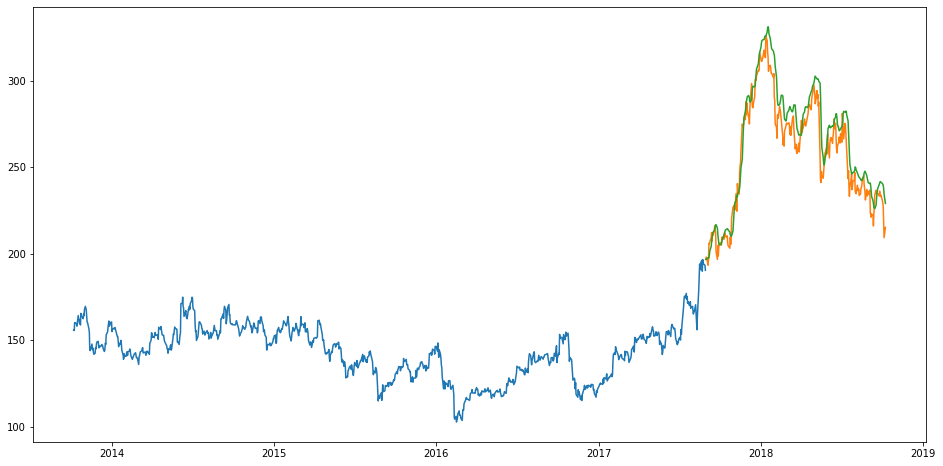

In [73]:
#for plotting
train = new_data[:960]
valid = new_data[960:]
valid['Predictions'] = closing_price

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


In [74]:
dframe3 = pd.DataFrame({'Actual':valid['Close'], 'Predicted':valid['Predictions']})

In [75]:
dframe3.head(50)

,Actual,Predicted
Date,,
2017-08-30,197.05,196.587280
2017-08-31,198.0,196.560013
2017-09-01,197.6,197.012695
2017-09-04,193.3,197.589355
2017-09-05,196.7,197.437424
2017-09-06,205.95,197.545883
2017-09-07,205.75,199.328125
2017-09-08,206.9,201.644135
2017-09-11,209.25,204.102203


In [76]:
dframe3.tail(50)

,Actual,Predicted
Date,,
2018-07-24,246.3,245.995316
2018-07-25,236.9,246.692368
2018-07-26,239.1,246.647659
2018-07-27,242.25,246.767395
2018-07-30,242.2,247.517487
2018-07-31,246.9,248.418259
2018-08-01,235.65,250.118408
2018-08-02,235.45,249.745880
2018-08-03,234.65,248.423309


**By comparing RMSE values of all three algorithms, we can say that LSTM performs well in prediction as its RMSE value is very less than that of linear regression and KNN. Also from the above graphs, we can clearly see that LSTM identifies the future trend correctly.**